# Heart Disease Prediction

Created By: Muhammand Alif Hidayah & Alfriando C Vean

## Problem Understanding

### Context

Penyakit jantung merupakan salah satu penyebab utama kematian di seluruh dunia. Deteksi dini terhadap kemungkinan seseorang menderita penyakit jantung sangat penting agar dapat dilakukan pencegahan dan penanganan lebih lanjut. Rumah sakit maupun lembaga kesehatan dapat memanfaatkan data pasien untuk memprediksi kemungkinan adanya penyakit jantung, sehingga dokter dapat terbantu dalam proses pengambilan keputusan medis dan intervensi lebih awal.

### Target

0: Tidak memiliki penyakit jantung (No Heart Disease)

1: Memiliki penyakit jantung (Heart Disease)

### Problem Statement

Diagnosis penyakit jantung seringkali membutuhkan berbagai pemeriksaan medis yang memakan waktu, biaya, serta sumber daya. Dengan banyaknya pasien yang harus diperiksa, tenaga medis memerlukan dukungan sistem prediksi berbasis data untuk membantu menilai risiko penyakit jantung lebih cepat. Oleh karena itu, diperlukan model machine learning untuk memprediksi kemungkinan penyakit jantung berdasarkan data kesehatan pasien (misalnya: usia, tekanan darah, kolesterol, detak jantung, dll).

### Goals

**Memprediksi apakah seorang pasien memiliki penyakit jantung atau tidak.**

---

## Analytic Approach

- Melakukan eksplorasi data untuk memahami distribusi dan hubungan antar fitur dengan target penyakit jantung.

- Melakukan preprocessing data.

- Membangun beberapa model klasifikasi.

- Mengevaluasi model menggunakan metrik yang sesuai dengan kebutuhan medis.

---

## Metric Evaluation

### Type 1 error (False Positive):


Model memprediksi pasien memiliki penyakit jantung, padahal sebenarnya tidak.

Konsekuensi: Pasien mungkin akan menjalani tes medis tambahan yang sebenarnya tidak diperlukan → menambah biaya & beban psikologis pasien.

### Type 2 error (False Negative):

Model memprediksi pasien tidak memiliki penyakit jantung, padahal sebenarnya ada.

Konsekuensi: Pasien benar-benar berisiko tapi tidak mendapatkan perawatan yang seharusnya → bisa berakibat fatal.

Karena risiko utama adalah tidak terdeteksinya pasien yang benar-benar memiliki penyakit jantung, maka metrik evaluasi yang paling penting adalah Recall, agar sebanyak mungkin pasien berisiko dapat teridentifikasi.

# Data

## Data Preparation

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, RobustScaler, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import KBinsDiscretizer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold, RandomizedSearchCV,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import set_config
set_config(display='diagram')
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Interpretable AI
import shap

# ExportModel
import pickle

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Set max rows
pd.set_option('display.max_columns', None)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.sample(10, random_state=14)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
136,137,70,Male,Cleveland,asymptomatic,145.0,174.0,False,normal,125.0,True,2.6,downsloping,0.0,reversable defect,4
903,904,56,Male,VA Long Beach,asymptomatic,130.0,203.0,True,normal,98.0,False,1.5,flat,NaN,reversable defect,1
616,617,46,Male,Switzerland,asymptomatic,115.0,0.0,False,normal,113.0,True,1.5,flat,NaN,reversable defect,1
210,211,37,Female,Cleveland,non-anginal,120.0,215.0,False,normal,170.0,False,0.0,upsloping,0.0,normal,0
824,825,64,Male,VA Long Beach,asymptomatic,130.0,223.0,False,st-t abnormality,128.0,False,0.5,flat,NaN,NaN,0
583,584,43,Male,Hungary,asymptomatic,140.0,288.0,False,normal,135.0,True,2.0,flat,NaN,NaN,1
873,874,55,Male,VA Long Beach,asymptomatic,158.0,217.0,False,normal,110.0,True,2.5,flat,NaN,NaN,1
449,450,54,Female,Hungary,atypical angina,160.0,312.0,False,normal,130.0,False,0.0,NaN,NaN,NaN,0
539,540,48,Male,Hungary,asymptomatic,160.0,355.0,False,normal,99.0,True,2.0,flat,NaN,NaN,1
705,706,65,Male,Switzerland,asymptomatic,145.0,0.0,NaN,st-t abnormality,67.0,False,NaN,NaN,NaN,fixed defect,3


In [3]:
df.shape

(920, 16)

Deskripsi Kolom Dataset Heart Disease

| Nama Kolom (Asli)         | Deskripsi                                                                 |
|----------------------------|---------------------------------------------------------------------------|
| **id**                     | Identitas unik untuk setiap pasien.                                       |
| **age**                    | Usia pasien dalam tahun.                                                  |
| **sex**                    | Jenis kelamin pasien                       |
| **dataset**                | Asal dataset pasien (misalnya: Cleveland, Hungary, dll.).                 |
| **cp (chest_pain_type)**   | Jenis nyeri dada |
| **trestbps (resting_blood_pressure)** | Tekanan darah saat istirahat (mm Hg).                                     |
| **chol (cholesterol)**     | Kadar kolesterol dalam darah (mg/dl).                                     |
| **fbs (fasting_blood_sugar)** | Kadar gula darah puasa (> 120 mg/dl → 1, ≤ 120 mg/dl → 0).               |
| **restecg (resting_ecg)**  | Hasil elektrokardiogram saat istirahat |
| **thalach (max_heart_rate_achieved)** | Denyut jantung maksimum yang dicapai pasien.                              |
| **exang (exercise_induced_angina)** | Apakah pasien mengalami angina akibat olahraga |
| **oldpeak (st_depression)** | Depresi segmen ST akibat olahraga dibanding kondisi istirahat.           |
| **slope (st_slope)**       | Kemiringan segmen ST saat puncak latihan |
| **ca (num_major_vessels)** | Jumlah pembuluh darah besar yang diwarnai dengan fluoroskopi (0–3).       |
| **thal (thalassemia)**     | Jenis kelainan thalassemia |
| **num (target)**           | Diagnosis penyakit jantung (0 = tidak ada penyakit, 1–4 = tingkat keparahan penyakit jantung). |


## Exploratory Data Analysis

### Change Columns Name

Karena kolom-kolom berupa singkatan dari dunia medis, maka akan diubah menjadi nama yang lebih representatif. Ide ini dipinjam dari [Rob Harrand](https://www.kaggle.com/code/tentotheminus9/what-causes-heart-disease-explaining-the-model).

In [4]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalch': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

Kolom num (target) masih memeiliki value 0-4, di mana 0 melambangkan tidak adanya penyakit jantung, sementara 1-4 melambangkan keparahan penyakit. Karena objektif analisis ini adalah hanya mendeteksi penyakit jantung dan mengesampingkan keparahannya, maka value 1-4 akan disamaratakan dengan 1 yang menunjukkan adanya penyakit jantung.

In [5]:
df['target'] = df['num'].apply(lambda x: 0 if x==0 else 1)
df.drop('num', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         920 non-null    int64  
 1   age                        920 non-null    int64  
 2   sex                        920 non-null    object 
 3   dataset                    920 non-null    object 
 4   chest_pain_type            920 non-null    object 
 5   resting_blood_pressure     861 non-null    float64
 6   cholesterol                890 non-null    float64
 7   fasting_blood_sugar        830 non-null    object 
 8   resting_electrocardiogram  918 non-null    object 
 9   max_heart_rate_achieved    865 non-null    float64
 10  exercise_induced_angina    865 non-null    object 
 11  st_depression              858 non-null    float64
 12  st_slope                   611 non-null    object 
 13  num_major_vessels          309 non-null    float64

### Drop Useless Columns

Kolom `id`dan `dataset` akan didrop karena tidak berguna untuk prediksi.

In [7]:
df.drop('id', axis=1, inplace=True)
df.drop('dataset', axis=1, inplace=True)

In [8]:
# memisahkan kolom kategorikal dan numerikal agar mudah untuk preprocessing dan EDA
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

num_cols.remove('target')

### Missing Values

In [9]:
df.isnull().sum()

age                            0
sex                            0
chest_pain_type                0
resting_blood_pressure        59
cholesterol                   30
fasting_blood_sugar           90
resting_electrocardiogram      2
max_heart_rate_achieved       55
exercise_induced_angina       55
st_depression                 62
st_slope                     309
num_major_vessels            611
thalassemia                  486
target                         0
dtype: int64

Nilai null diisi menggunakan median untuk kolom numerikal dan modus untuk kolom kategorikal.

In [10]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [11]:
df.isnull().sum()

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
target                       0
dtype: int64

### Duplicated Values

In [12]:
df.duplicated().sum()

np.int64(2)

Data duplikat akan di-drop.

In [ ]:
df.drop_duplicates(inplace=True)

### Descriptive Statistics

In [13]:
df.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.553261
std,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,0.497426
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [14]:
df.describe(include='object')

,sex,chest_pain_type,resting_electrocardiogram,st_slope,thalassemia
count,920,920,920,920,920
unique,2,4,3,3,3
top,Male,asymptomatic,normal,flat,normal
freq,726,496,553,654,682


In [15]:
def categorical_unique_summary(df):
    
    summary_data = []
    
    for col in cat_cols:
        unique_vals = df[col].unique()
        unique_vals_clean = [str(val) for val in unique_vals if pd.notna(val)]
        
        summary_data.append({
            'Column_Name': col,
            'Unique_Count': df[col].nunique(),
            'Unique_Values': ', '.join(unique_vals_clean)
        })
    
    return pd.DataFrame(summary_data)

categorical_df = categorical_unique_summary(df)
categorical_df

,Column_Name,Unique_Count,Unique_Values
0,sex,2,"Male, Female"
1,chest_pain_type,4,"typical angina, asymptomatic, non-anginal, aty..."
2,fasting_blood_sugar,2,"True, False"
3,resting_electrocardiogram,3,"lv hypertrophy, normal, st-t abnormality"
4,exercise_induced_angina,2,"False, True"
5,st_slope,3,"downsloping, flat, upsloping"
6,thalassemia,3,"fixed defect, normal, reversable defect"


### Categorical Features

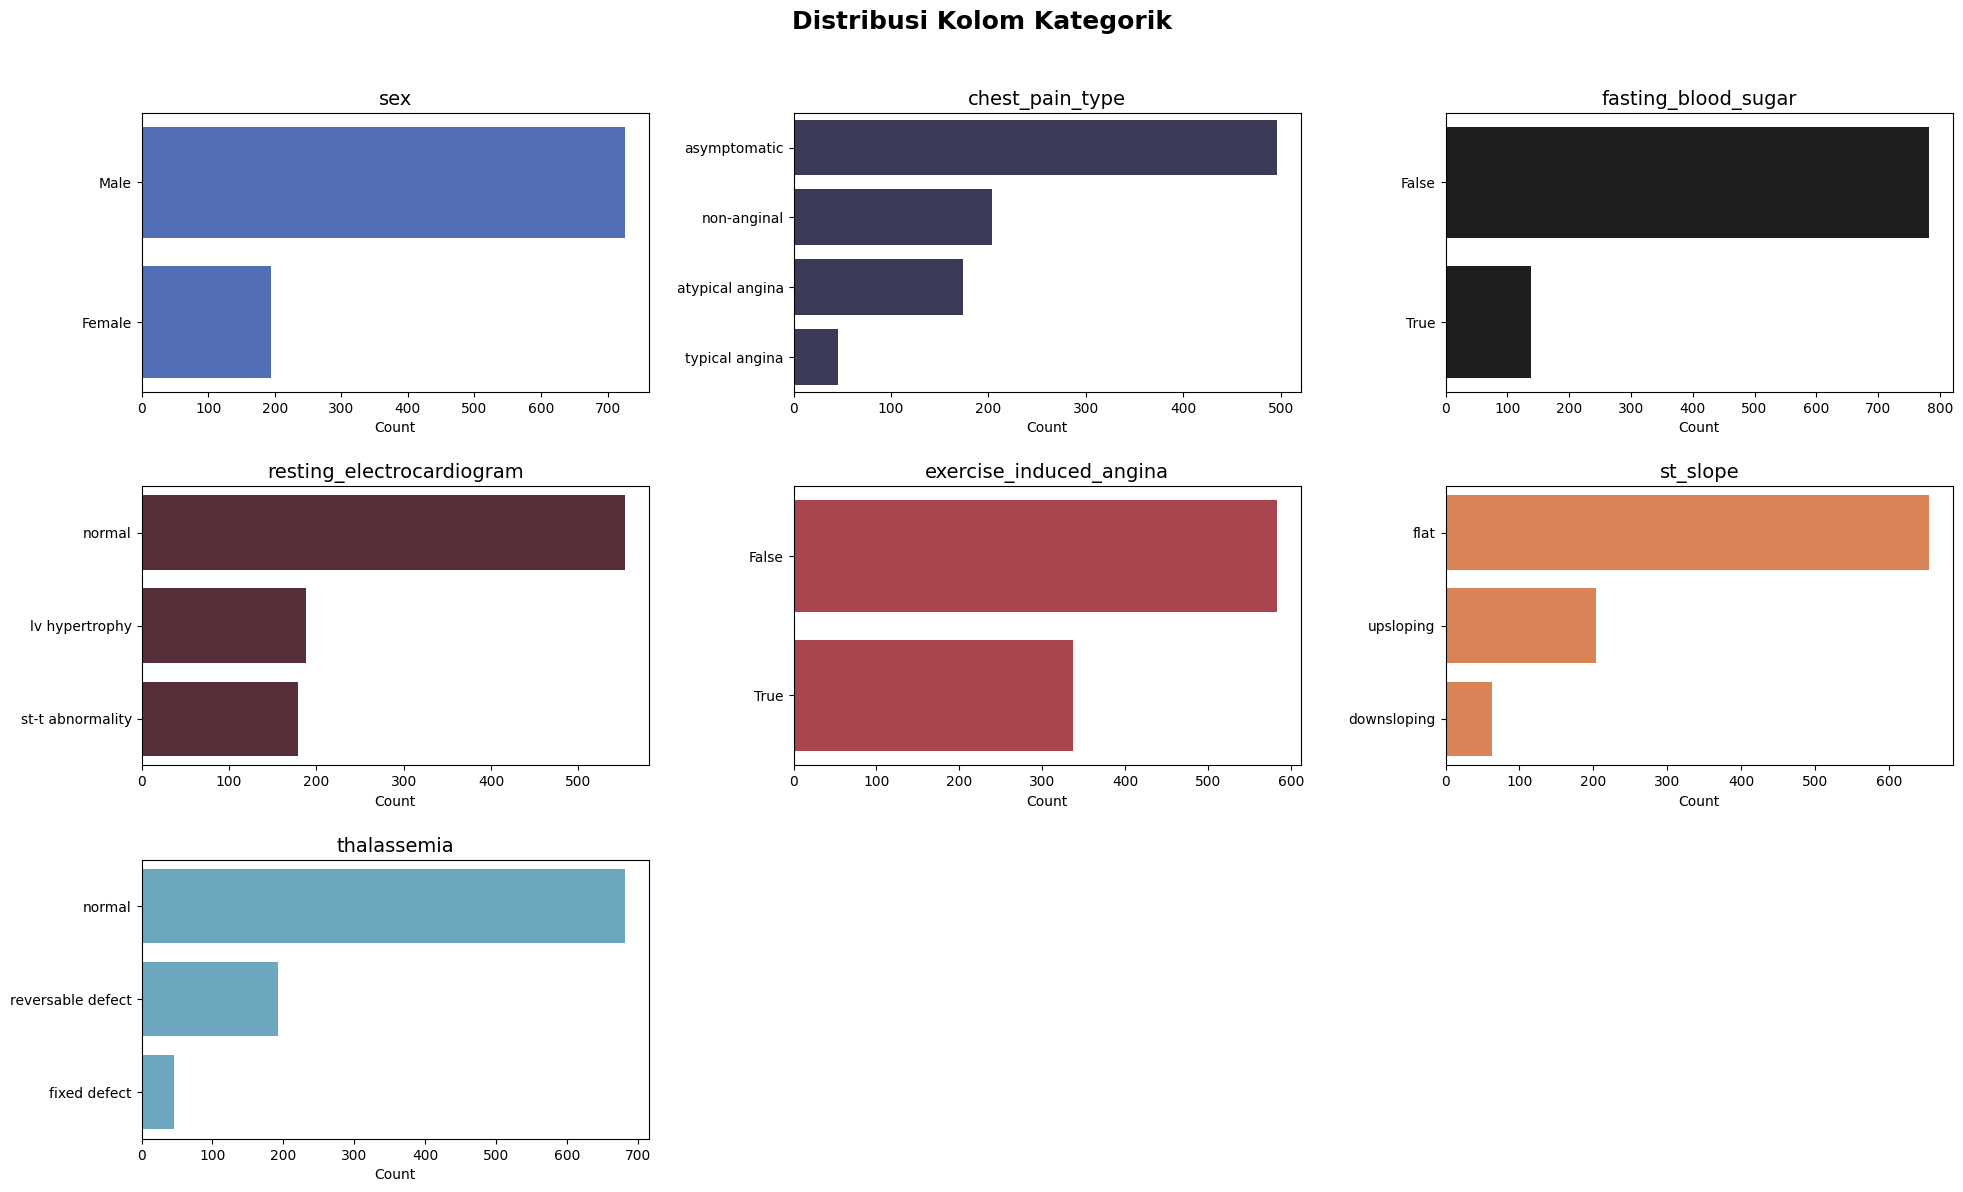

In [16]:
def shorten_text(text, max_length=20):
    return text[:max_length] + '...' if len(text) > max_length else text

cols_sum = len(cat_cols)
cols_rows = (cols_sum // 3) + (1 if cols_sum % 3 != 0 else 0)

palette = sns.color_palette("icefire", cols_sum)

plt.figure(figsize=(20, cols_rows * 4))

for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(cols_rows, 3, i)

    value_counts = df[col].value_counts().nlargest(10)

    shortened_labels = [shorten_text(str(label)) for label in value_counts.index]

    sns.barplot(y=shortened_labels, x=value_counts.values, color=palette[i % len(palette)], orient='h', ax=ax)
    ax.set_title(f'{col}', fontsize=14)
    ax.set_xlabel('Count')
    ax.set_ylabel('')

    ax.tick_params(axis='both', labelsize=10)

plt.suptitle("Distribusi Kolom Kategorik", fontsize=18, fontweight='bold', y=1)
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
plt.show()

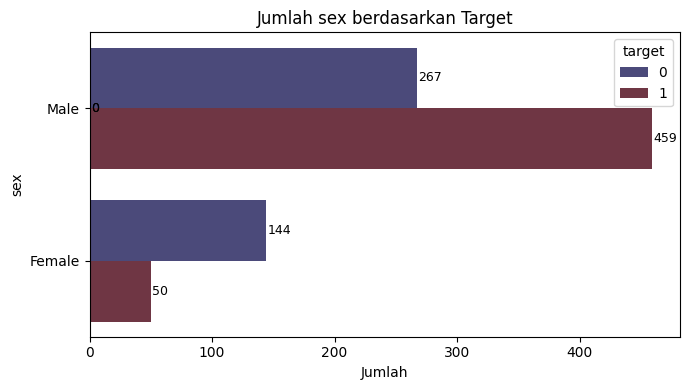

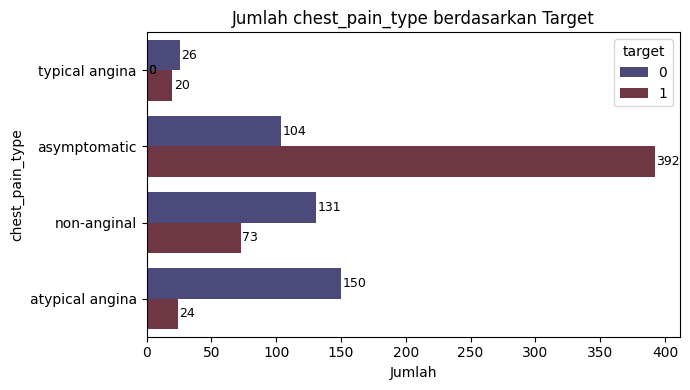

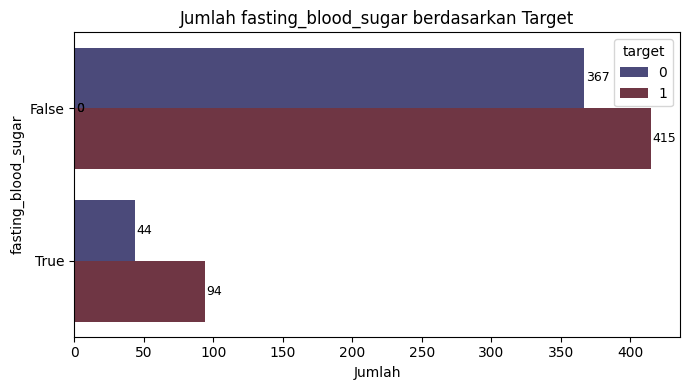

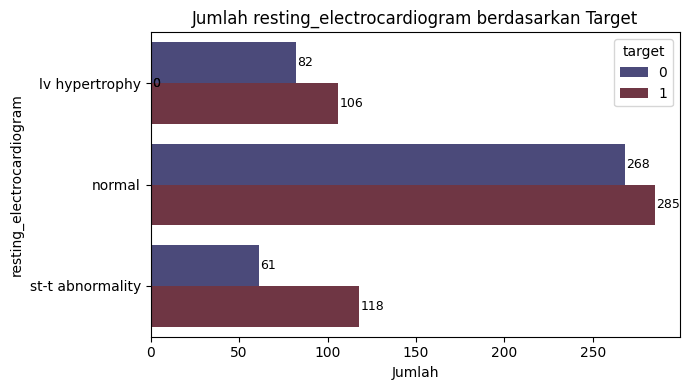

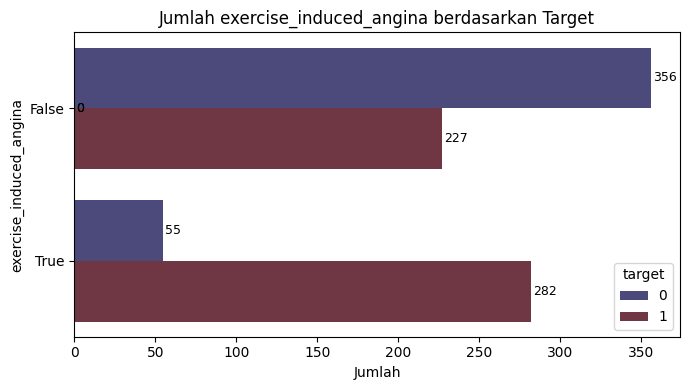

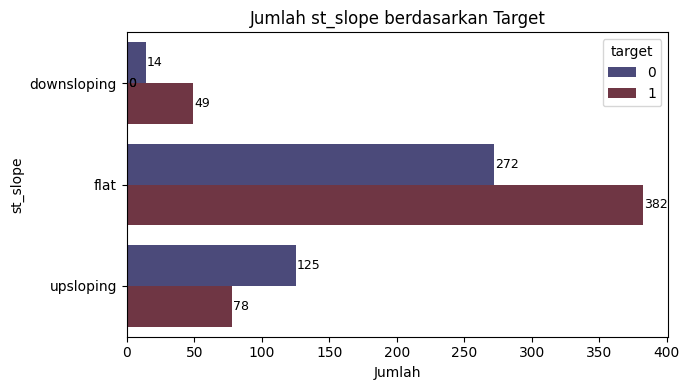

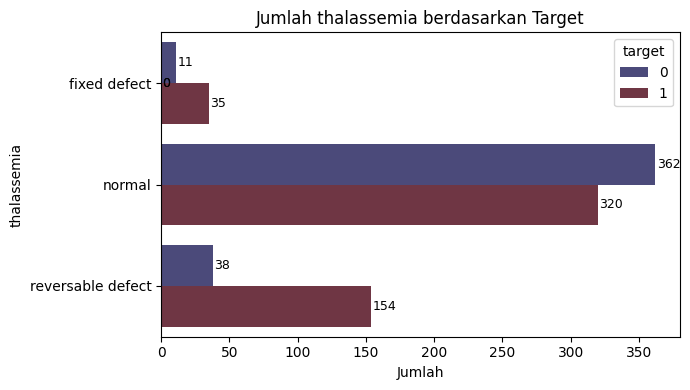

In [17]:
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=df, y=col, hue='target', palette='icefire')
    plt.title(f'Jumlah {col} berdasarkan Target')
    plt.ylabel(col)
    plt.xlabel("Jumlah")
    
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{int(width)}', (width + 1, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

### Numerical Features

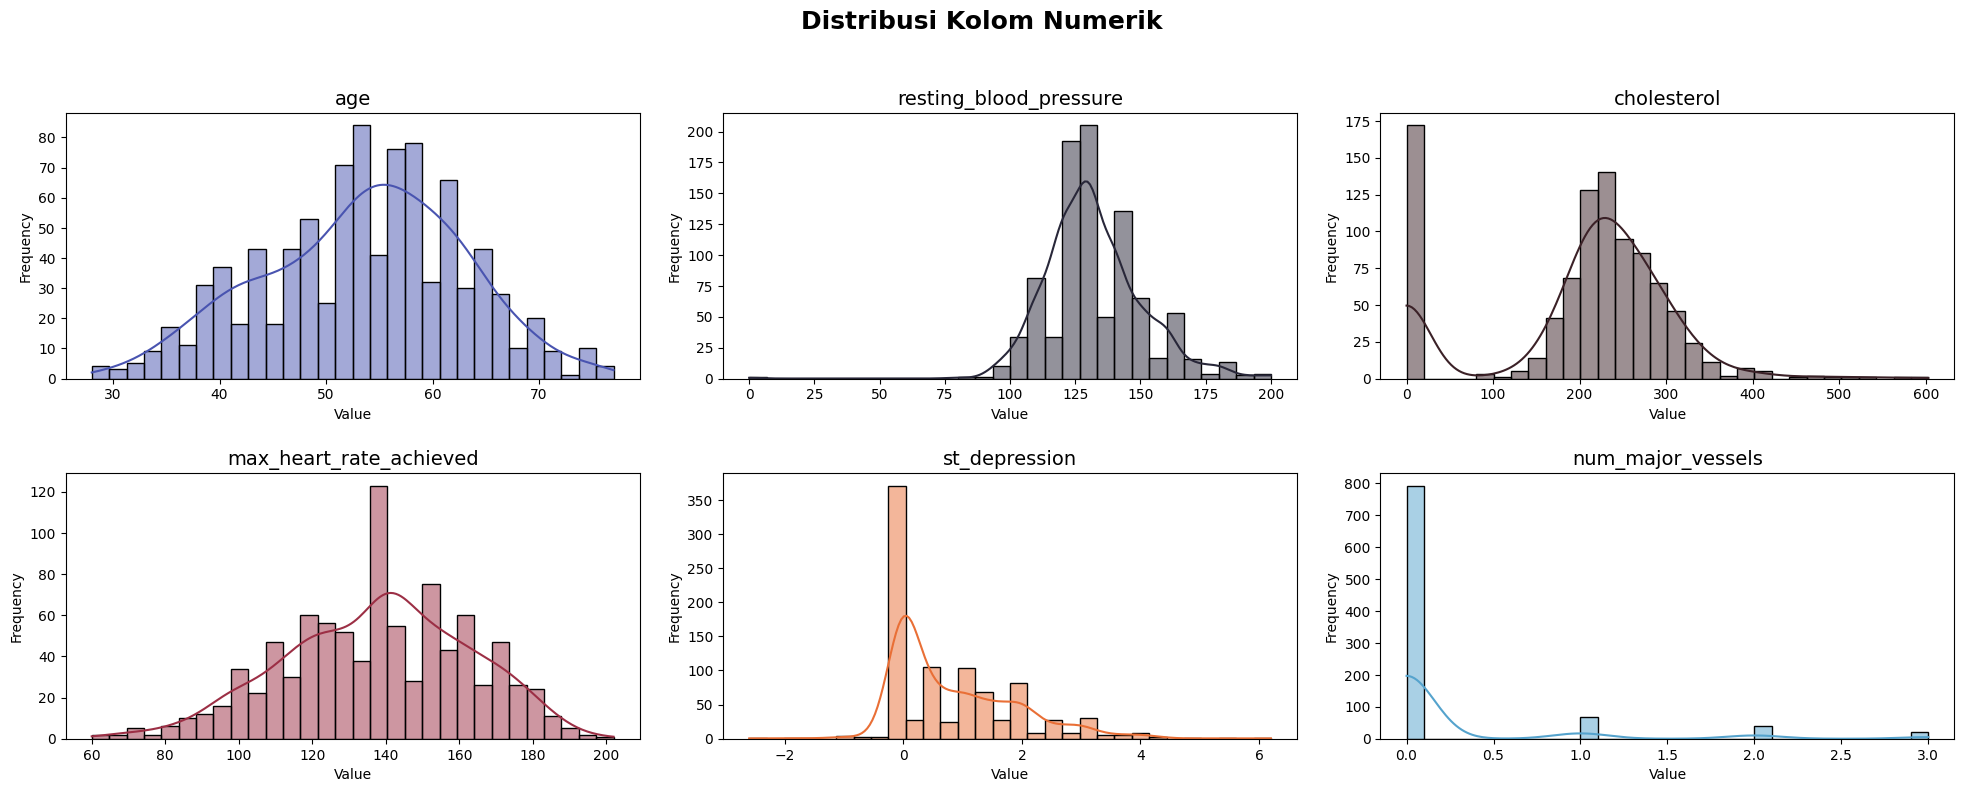

In [18]:
cols_sum = len(num_cols)
cols_rows = (cols_sum // 3) + (1 if cols_sum % 3 != 0 else 0)

palette = sns.color_palette("icefire", cols_sum)

plt.figure(figsize=(20, cols_rows * 4))

for i, col in enumerate(num_cols, 1):
    ax = plt.subplot(cols_rows, 3, i)

    sns.histplot(df[col], bins=30, kde=True, color=palette[i % len(palette)], ax=ax)
    ax.set_title(f'{col}', fontsize=14)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

    ax.tick_params(axis='both', labelsize=10)

plt.suptitle("Distribusi Kolom Numerik", fontsize=18, fontweight='bold', y=1)
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
plt.show()

### Correlation

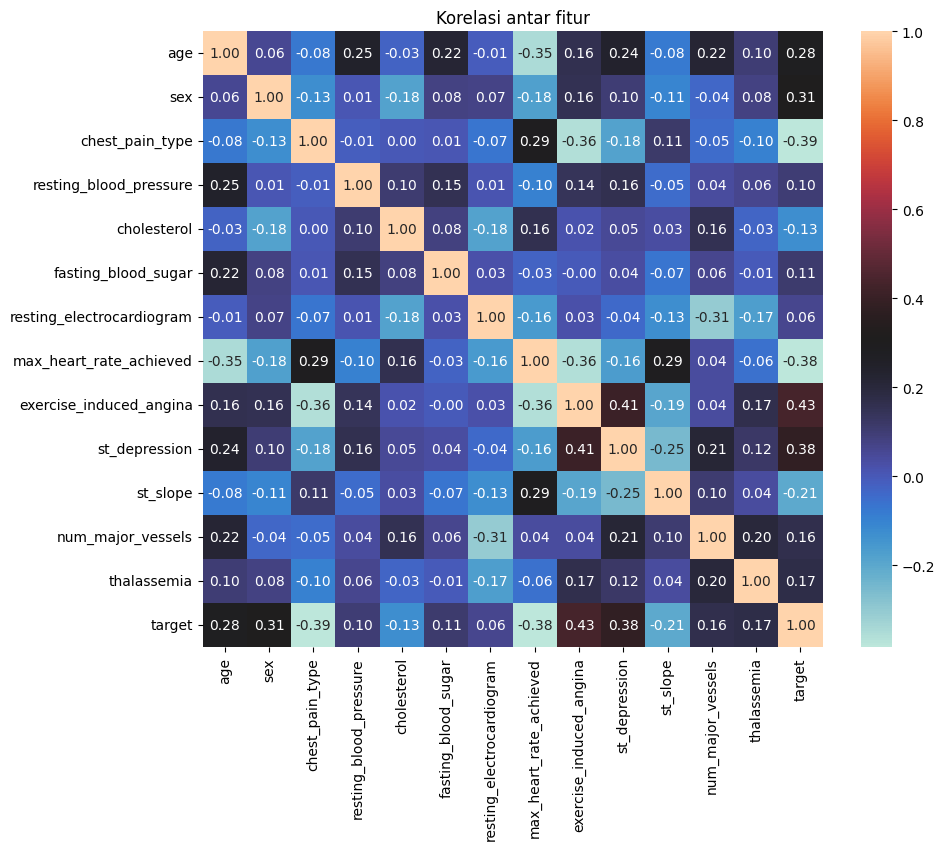

In [19]:
df_encoded = df.apply(LabelEncoder().fit_transform)

df_corr = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='icefire', fmt=".2f")
plt.title("Korelasi antar fitur")
plt.show()

Tidak ada kolom yang berkorelasi tinggi antara satu dengan yang lain (tidak redundan), sehingga aman digunakan sebagai fitur untuk modeling tanpa harus terkendala multikolinearitas.

### Target

In [36]:
target_counts = df['target'].value_counts().reset_index()
target_counts.columns = ['target', 'Count']

fig = px.pie(
    target_counts, 
    values='Count', 
    names='target', 
    title='Distribusi Churn Pelanggan',
    color= 'target',
    color_discrete_map={1: 'Black', 0: 'Purple'}
)
fig.show()


## Feature Engineering

### Split Data

In [21]:
X = df.drop('target', axis=1)
y = df['target']


X.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=14)

### Pipeline

Karena model seperti Logistic Regression memerlukan scaling sementara Decision Tree tidak, maka akan dibuat 2 pipeline yang berbeda.

In [23]:
preprocessor_with_scaling = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('onehot', OneHotEncoder(drop='first'), cat_cols),
], remainder='passthrough')

preprocessor_with_scaling

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['age', 'resting_blood_pressure',
                                  'cholesterol', 'max_heart_rate_achieved',
                                  'st_depression', 'num_major_vessels']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['sex', 'chest_pain_type',
                                  'fasting_blood_sugar',
                                  'resting_electrocardiogram',
                                  'exercise_induced_angina', 'st_slope',
                                  'thalassemia'])])

In [24]:
preprocessor_without_scaling = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), cat_cols),
], remainder='passthrough')

preprocessor_without_scaling

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['sex', 'chest_pain_type',
                                  'fasting_blood_sugar',
                                  'resting_electrocardiogram',
                                  'exercise_induced_angina', 'st_slope',
                                  'thalassemia'])])

# Modeling

## Baseline

Mempertimbangkan kepentingan untuk mengetahui fitur mana saja yang berpengaruh terhadap penyakit jantung, maka yang digunakan adalah model-model yang bisa diinterpretasi. Kali ini akan menggunakan Decision Tree dan Logistic Regression.

In [25]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=14),
    'DecisionTree': DecisionTreeClassifier(random_state=14),
}

Pertama-tama, akan dicoba seluruh model terlebih dahulu tanpa perlakuan apapun.

In [26]:
results_baseline = []

for name, model in models.items():
    preprocessor = preprocessor_with_scaling if name in ['LogisticRegression'] else preprocessor_without_scaling

    pipe_base = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    pipe_base.fit(X_train, y_train)
    y_pred_train = pipe_base.predict(X_train)
    y_pred_test = pipe_base.predict(X_test)

    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train, average='binary', pos_label=1),
        'Recall': recall_score(y_train, y_pred_train, average='binary', pos_label=1),
        'F1 Score': f1_score(y_train, y_pred_train, average='binary', pos_label=1)
    }

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary', pos_label=1),
        'Recall': recall_score(y_test, y_pred_test, average='binary', pos_label=1),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary', pos_label=1)
    }

    results_baseline.append({
        'Model': name,
        'Train Recall': train_metrics['Recall'],
        'Test Recall': test_metrics['Recall'],
        'Train Accuracy': train_metrics['Accuracy'],
        'Test Accuracy': test_metrics['Accuracy'],
        'Train Precision': train_metrics['Precision'],
        'Test Precision': test_metrics['Precision'],
        'Train F1': train_metrics['F1 Score'],
        'Test F1': test_metrics['F1 Score']
    })

results_baseline_df = pd.DataFrame(results_baseline)
print("\\Hasil Baseline Model:")
results_baseline_df.sort_values(by='Test Recall', ascending=False).round(3)

\Hasil Baseline Model:


,Model,Train Recall,Test Recall,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1,Test F1
0,LogisticRegression,0.853,0.835,0.822,0.804,0.83,0.815,0.841,0.825
1,DecisionTree,1.000,0.724,1.000,0.704,1.00,0.736,1.000,0.730


Logistic Regression menghasilkan Recall yang cukup bagus, namun pada Decision Tree menunjukkan overfitting.

## Hyperparameter Tuned

Selanjuttnya menggunakan tuning hyperparameter yang sederhana.

In [27]:
param_grids = {
    'LogisticRegression': {
        'model__C': [0.01, 0.1, 1, 10]
    },
    'DecisionTree': {
        'model__max_depth': [3, 5, 10, 15, None],
        'model__min_samples_split': [2, 5, 10],
    }
}

Hyperparameter yang digunakan masih sedikit kombinasinya, karena pada tahap ini masih proses mencari model terbaik yang ingin dikembangkan.

In [28]:
results_tuning = []

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=14) 
for name, model in models.items():
    preprocessor = preprocessor_with_scaling if name in ['LogisticRegression'] else preprocessor_without_scaling

    tuning_pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    search = RandomizedSearchCV(
        estimator=tuning_pipe,
        param_distributions=param_grids[name],
        cv=cv_strategy,
        n_iter=5,
        scoring='recall',
        n_jobs=-1,
        random_state=14
    )

    search.fit(X_train, y_train)
    print(f"{name} best params:", search.best_params_)
    best_model = search.best_estimator_

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train, average='binary', pos_label=1),
        'Recall': recall_score(y_train, y_pred_train, average='binary', pos_label=1),
        'F1 Score': f1_score(y_train, y_pred_train, average='binary', pos_label=1)
    }

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary', pos_label=1),
        'Recall': recall_score(y_test, y_pred_test, average='binary', pos_label=1),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary', pos_label=1)
    }

    results_tuning.append({
        'Model': name,
        'Train Recall': train_metrics['Recall'],
        'Test Recall': test_metrics['Recall'],
        'Train Accuracy': train_metrics['Accuracy'],
        'Test Accuracy': test_metrics['Accuracy'],
        'Train Precision': train_metrics['Precision'],
        'Test Precision': test_metrics['Precision'],
        'Train F1': train_metrics['F1 Score'],
        'Test F1': test_metrics['F1 Score']
    })

results_tuning_df = pd.DataFrame(results_tuning)
print("\\Hasil Tuning Model:")
results_tuning_df.sort_values(by='Test Recall', ascending=False).round(3)

LogisticRegression best params: {'model__C': 0.1}
DecisionTree best params: {'model__min_samples_split': 5, 'model__max_depth': 3}
\Hasil Tuning Model:


,Model,Train Recall,Test Recall,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1,Test F1
1,DecisionTree,0.869,0.858,0.784,0.774,0.770,0.762,0.817,0.807
0,LogisticRegression,0.861,0.835,0.828,0.791,0.833,0.797,0.847,0.815


Kedua model mengalami sedikit kenaikan performa dengan tuning sederhana, maka selanjutnya akan diberlakukan tuning lebih lanjut.

## Advance Hyperparameter Tuned

In [29]:
best_params = {
    'LogisticRegression': [
        {   # L1 penalty
            'model__penalty': ['l1'],
            'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'model__solver': ['liblinear', 'saga'],
            'model__l1_ratio': [None]
        },
        {   # L2 penalty
            'model__penalty': ['l2'],
            'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'model__solver': ['liblinear', 'saga'],
            'model__l1_ratio': [None]
        },
        {   # ElasticNet penalty
            'model__penalty': ['elasticnet'],
            'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'model__solver': ['saga'],
            'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
        },
        {   # No penalty
            'model__penalty': ['none'],
            'model__solver': ['saga', 'lbfgs'],
            'model__l1_ratio': [None]
        }
    ],

    'DecisionTree': {
        'model__criterion': ['gini', 'entropy', 'log_loss'],
        'model__max_depth': [3, 5, 10, 15, 20, None],
        'model__min_samples_split': [2, 5, 10, 20],
        'model__min_samples_leaf': [1, 2, 4, 6],
        'model__max_features': ['sqrt', 'log2', None],
    }
}

In [30]:
best_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=14),
    'DecisionTree': DecisionTreeClassifier(random_state=14)
}

results_best = []

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)

for name, model in best_models.items():
    preprocessor = preprocessor_with_scaling if name == 'LogisticRegression' else preprocessor_without_scaling

    smote_tuning_pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    search = RandomizedSearchCV(
        estimator=smote_tuning_pipe,
        param_distributions=best_params[name],
        cv=cv_strategy,
        n_iter=5,
        scoring='recall',
        n_jobs=-1,
        random_state=14
    )

    search.fit(X_train, y_train)
    print(f"{name} best params:", search.best_params_)
    best_model = search.best_estimator_

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train, average='binary', pos_label=1),
        'Recall': recall_score(y_train, y_pred_train, average='binary', pos_label=1),
        'F1 Score': f1_score(y_train, y_pred_train, average='binary', pos_label=1)
    }

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary', pos_label=1),
        'Recall': recall_score(y_test, y_pred_test, average='binary', pos_label=1),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary', pos_label=1)
    }

    results_best.append({
        'Model': name,
        'Train Recall': train_metrics['Recall'],
        'Test Recall': test_metrics['Recall'],
        'Train Accuracy': train_metrics['Accuracy'],
        'Test Accuracy': test_metrics['Accuracy'],
        'Train Precision': train_metrics['Precision'],
        'Test Precision': test_metrics['Precision'],
        'Train F1': train_metrics['F1 Score'],
        'Test F1': test_metrics['F1 Score']
    })

results_best_df = pd.DataFrame(results_best)
results_best_df.sort_values(by='Test Recall', ascending=False).round(3)

LogisticRegression best params: {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__l1_ratio': None, 'model__C': 0.0001}
DecisionTree best params: {'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 5, 'model__criterion': 'entropy'}


,Model,Train Recall,Test Recall,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1,Test F1
0,LogisticRegression,0.872,0.882,0.778,0.752,0.762,0.727,0.813,0.797
1,DecisionTree,0.788,0.701,0.810,0.748,0.858,0.817,0.821,0.754


## Final Model

Logisitic Regression dipilih sebagai model terbaik karena memiliki recall tertinggi pada data uji.

In [31]:
final_pipe = Pipeline([
    ('preprocess', preprocessor_with_scaling),
    ('model', LogisticRegression(
        solver='liblinear',
        penalty='l2',
        C=0.0001,
        l1_ratio=None,
    )),
])

final_pipe.fit(X_train, y_train)

# export model
with open('final_pipe.sav', 'wb') as file:
    pickle.dump(final_pipe, file)

with open('final_pipe.sav', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred_train = loaded_model.predict(X_train)
y_pred_test = loaded_model.predict(X_test)

recall_train = recall_score(y_train, y_pred_train, pos_label=1)
recall_test = recall_score(y_test, y_pred_test, pos_label=1)
precision_train = precision_score(y_train, y_pred_train, pos_label=1)
precision_test = precision_score(y_test, y_pred_test, pos_label=1)

recall_df = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Train Recall': [recall_train],
    'Test Recall': [recall_test],
    'Train Precision': [precision_train],
    'Test Precision': [precision_test]
})

recall_df.round(3)

,Model,Train Recall,Test Recall,Train Precision,Test Precision
0,Logistic Regression,0.872,0.882,0.762,0.727


## Feature Importance

                                              Feature  Coefficient  Importance
3                        num__max_heart_rate_achieved    -0.013327    0.013327
4                                  num__st_depression     0.012399    0.012399
0                                            num__age     0.010154    0.010154
13               onehot__exercise_induced_angina_True     0.008215    0.008215
2                                    num__cholesterol    -0.007411    0.007411
6                                    onehot__sex_Male     0.006749    0.006749
5                              num__num_major_vessels     0.005748    0.005748
7             onehot__chest_pain_type_atypical angina    -0.004806    0.004806
14                              onehot__st_slope_flat     0.004302    0.004302
17              onehot__thalassemia_reversable defect     0.003929    0.003929
1                         num__resting_blood_pressure     0.003204    0.003204
8                 onehot__chest_pain_type_non-angina

<Figure size 1000x600 with 0 Axes>

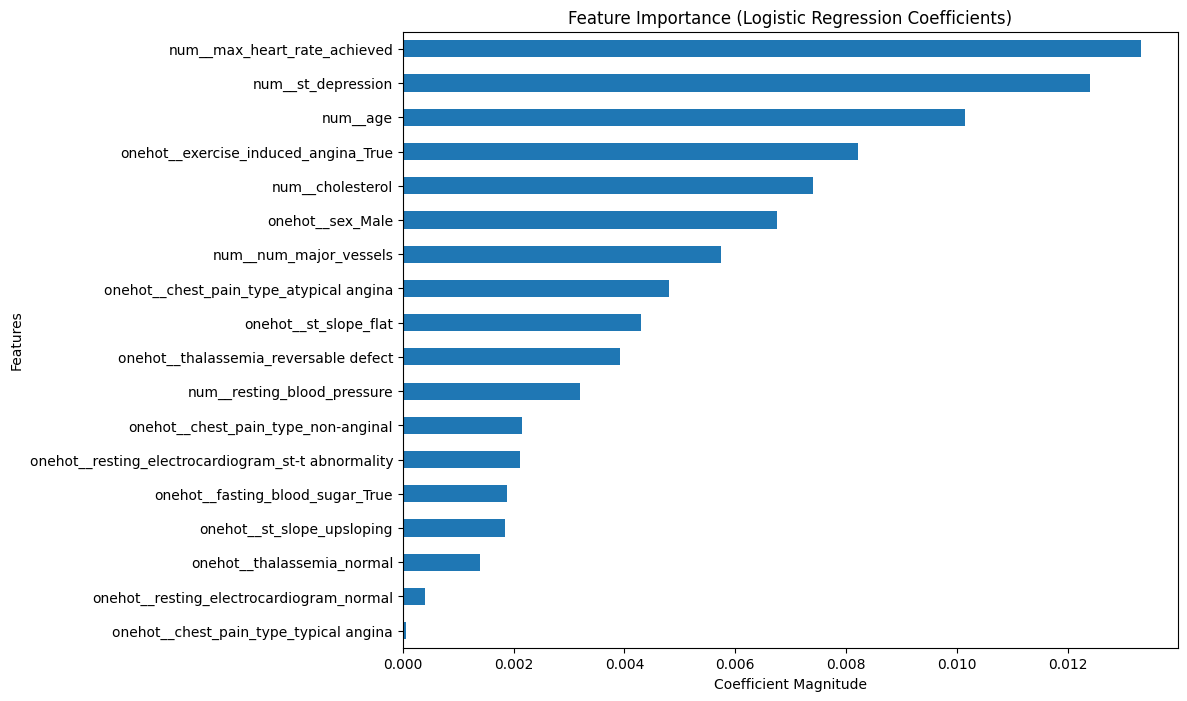

In [32]:
feature_names = final_pipe.named_steps['preprocess'].get_feature_names_out()

# Ambil koefisien dari logistic regression
coefs = final_pipe.named_steps['model'].coef_[0]

# Buat dataframe feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'Importance': np.abs(coefs)  # magnitude (besar pengaruh)
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10,6))
feature_importance.sort_values("Importance", ascending=True).plot(
    x="Feature", y="Importance", kind="barh", legend=False, figsize=(10,8)
)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.show()

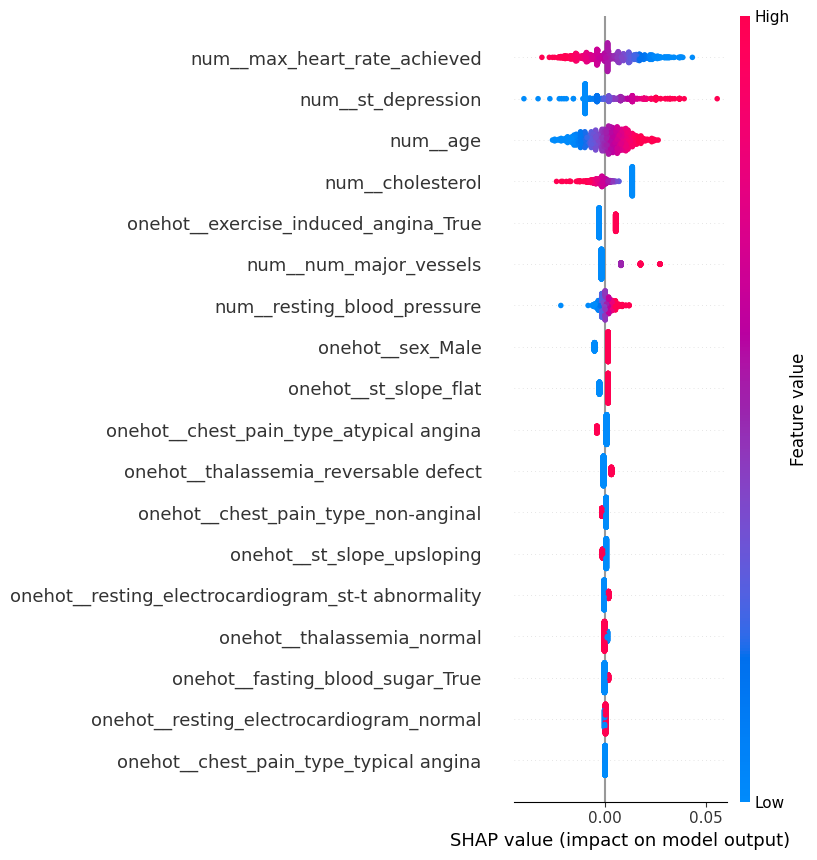

In [33]:
log_reg_model = final_pipe.named_steps['model']

X_train_transformed = final_pipe.named_steps['preprocess'].transform(X_train)

feature_names = final_pipe.named_steps['preprocess'].get_feature_names_out()

explainer = shap.Explainer(log_reg_model, X_train_transformed, feature_names=feature_names)

shap_values = explainer(X_train_transformed)

shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names, plot_type="dot")

1. Fitur paling berpengaruh:

- Max Heart Rate Achieved (num__max_heart_rate_achieved) memiliki pengaruh terbesar dalam menentukan risiko penyakit jantung. Nilai yang rendah cenderung meningkatkan kemungkinan penyakit jantung.

- ST Depression (num__st_depression) menunjukkan semakin tinggi nilainya, semakin besar kemungkinan pasien memiliki penyakit jantung.

- Age (num__age) menunjukkan usia yang lebih tua meningkatkan risiko.

- Cholesterol (num__cholesterol) menunjukkan kadar kolesterol yang tinggi berkontribusi terhadap peningkatan risiko.

- Exercise Induced Angina (onehot__exercise_induced_angina_True) menunjukkan pasien yang mengalami angina saat berolahraga memiliki risiko lebih tinggi.

2. Fitur moderat:

- Sex (onehot__sex_Male) menunjukkan laki-laki lebih cenderung berisiko dibanding perempuan.

- Number of Major Vessels (num__num_major_vessels) menunjukkan semakin banyak pembuluh darah besar yang mengalami penyempitan, semakin besar risiko.
